In [15]:
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

from utils.cross_validation import cross_validate
from utils.metrics import aucroc
from utils.estimators import LDAWrapper
from utils.base_set import X_train, y_train, seed

### LDA

In [16]:
mean_val_scores = []
std_val_scores = []
mean_train_scores = []
std_train_scores = []

best_params = {'shrinkage': 0.2700067367383665, 'solver': 'eigen'} # based on ej. 3 y 4
k = 5
n = X_train.shape[0]
cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=seed)
cols_val = [f"split_val_{i}" for i in range(k)]
cols_train = [f"split_train_{i}" for i in range(k)]
train = range(30, n, 10)
for idx in train:
    lda = LDAWrapper(**best_params)
    auc_scores, _ = cross_validate(lda, X_train[:idx,], y_train[:idx,], metric=aucroc, use_decision=True, cv=cv)
    mean_val_scores.append(auc_scores.mean_val.aucroc)
    std_val_scores.append(auc_scores[cols_val].std(axis=1).aucroc)
    mean_train_scores.append(auc_scores.mean_train.aucroc)
    std_train_scores.append(auc_scores[cols_train].std(axis=1).aucroc)

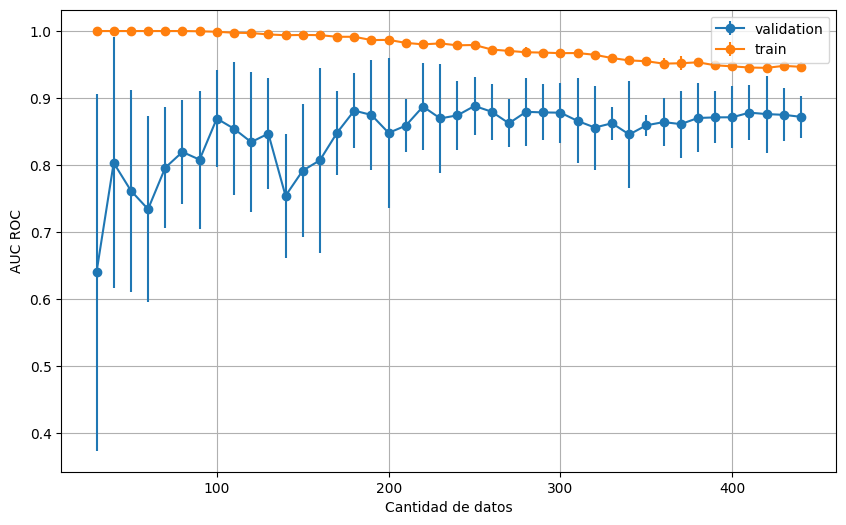

In [17]:
plt.figure(figsize=(10, 6))
plt.errorbar(train, mean_val_scores, std_val_scores, fmt='-o', label="validation")
plt.errorbar(train, mean_train_scores, std_train_scores, fmt='-o', label="train")
plt.legend()
plt.xlabel('Cantidad de datos')
plt.ylabel('AUC ROC')
# plt.title('Curva de Complejidad para Árbol de Decisión (criterion=Entropy)')
plt.grid(True)
plt.show()

In [18]:
max(mean_val_scores)

0.8882352941176471